# Non-negative Matrix Factorization

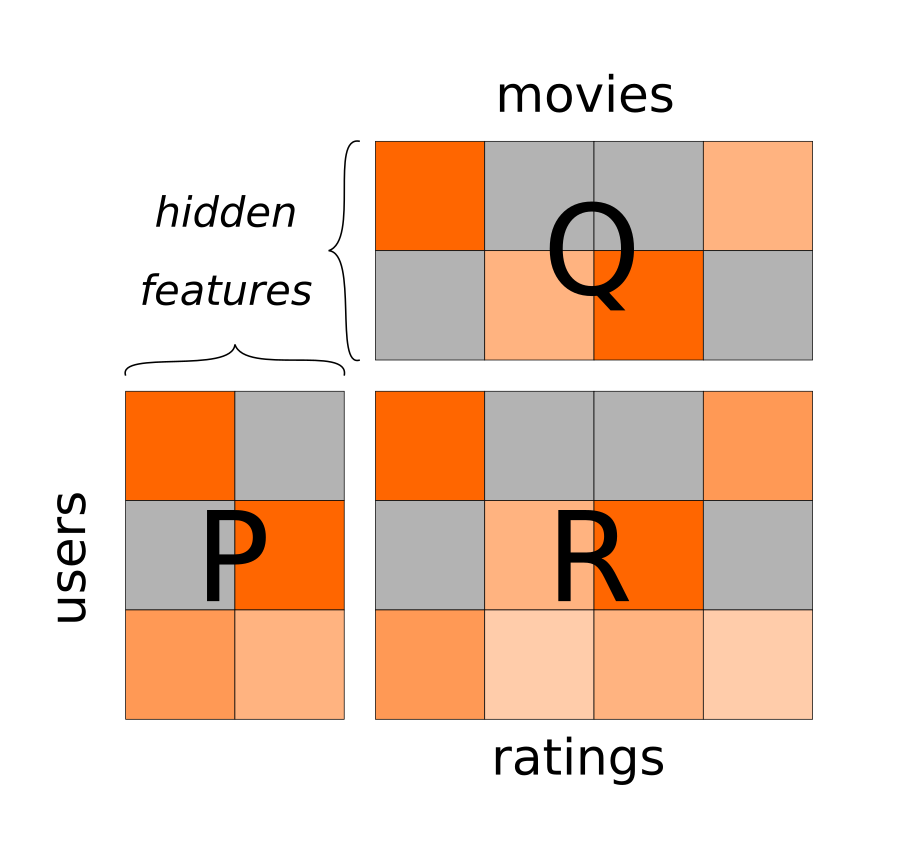

In non-negative matrix factorization, matrix R is decomposed into matrices P and Q such that a product of P and Q approximates matrix R. 

Why is this a good thing?
* Dimensionality reduction
* Interpretability

We are using NMF here for recommendations (which has its own issues because the NMF implementation in scikit-learn doesn't accept missing values), but you may come across it used in something called topic modeling. (Another common, and very cool, algorithm for topic modeling is Latent Dirichlet Allocation, LDA.)

In topic modeling, our hidden features are "topics". Each document then is a distribution of (all) topics, and each topic is a distribution of (all) words.

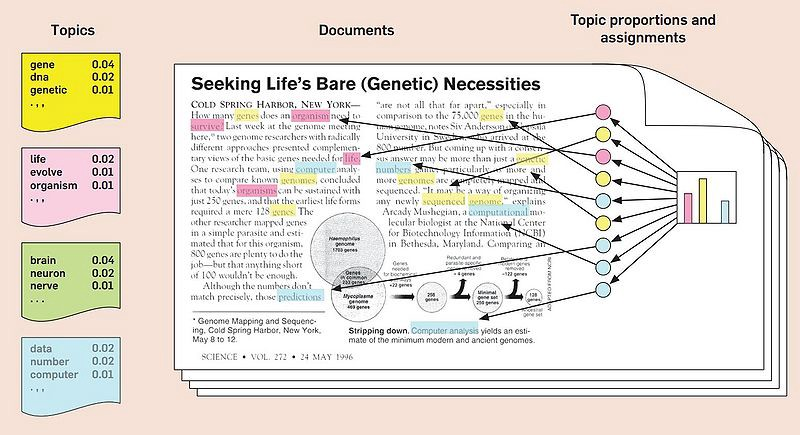

To get an intuitive sense for what NMF does and how it works, do an NMF-by-hand exercise [here](https://krspiced.pythonanywhere.com/_downloads/04922c12ffa2136cda8d3aba761b7b8e/NMF_Exercise.pdf)

In [1]:
import numpy as np
import pandas as pd

In [2]:
ratings = pd.read_csv('food.csv', index_col=0, na_values=[' '])
ratings.head()

,malte,alex,jamsheeda,jan,laurin,lutz,jens,marco
food,,,,,,,,
camembert,2.0,3,0.0,3,4.0,0.0,4.0,3.0
lentils,4.0,3,3.0,3,2.0,3.0,0.0,1.0
raisins,4.0,0,2.0,0,4.0,2.0,2.0,0.0
olives,0.0,4,2.0,4,0.0,4.0,2.0,4.0
crisps,4.0,4,3.0,2,3.0,3.0,0.0,3.0


scikit-learn implementation of NMF doesn't accept missing values, so we have to replace all NaNs. 

What are some ideas for what we can use to replace those:
* mean of each column/user (wouldn't work well if the user primarily rates just the items that they like, or just the item that they don't like)
* mean of each row/item (wouldn't work well if the user we are trying to predict for is particularly grumpy or enthusiastic)
* most common value in row/column
* "neutral" rating (e.g. 2.0)

In [3]:
ratings.fillna(ratings.mean(), inplace=True)

In [4]:
ratings = ratings.T
ratings.head()

food,camembert,lentils,raisins,olives,crisps,pork,beef,chicken,fish,seafood,...,jackfruit,kimchi,mozarella-sticks,cucumber,spinach,sushi,pellimeni,mochi,baklava,pesto
malte,2.0,4.0,4.0,0.0,4.0,1.00000,1.0,1.0,1.0,0.0,...,2.766667,2.766667,2.0,4.0,4.0,2.00000,2.766667,2.766667,2.0,4.0
alex,3.0,3.0,0.0,4.0,4.0,3.00000,2.0,3.0,4.0,2.0,...,1.000000,4.000000,4.0,3.0,4.0,4.00000,4.000000,4.000000,3.0,0.0
jamsheeda,0.0,3.0,2.0,2.0,3.0,2.62069,3.0,4.0,4.0,2.0,...,4.000000,2.620690,1.0,3.0,2.0,2.62069,2.620690,2.620690,4.0,1.0
jan,3.0,3.0,0.0,4.0,2.0,3.00000,4.0,3.0,3.0,3.0,...,4.000000,4.000000,0.0,3.0,3.0,3.00000,3.000000,4.000000,4.0,4.0
laurin,4.0,2.0,4.0,0.0,3.0,0.00000,0.0,0.0,0.0,0.0,...,2.451613,4.000000,2.0,3.0,4.0,1.00000,2.451613,2.451613,4.0,4.0


In [5]:
from sklearn.decomposition import NMF

In [6]:
nmf = NMF(n_components=4)
nmf.fit(ratings)

/home/mmuratardag/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=4)

We get get the matrix Q, which tells us how much each of the food items belongs to each of the 4 hidden features / components, with `nmf.components_`.

In [7]:
Q = nmf.components_

In [8]:
food_items = list(ratings.columns)

In [9]:
[print(a, b) for (a, b) in zip(Q.T, food_items)]

[0.         0.80396409 0.08958409 1.26748406] camembert
[1.49189768 0.61129543 0.27454635 0.        ] lentils
[1.16482746 0.         0.00183769 0.63762837] raisins
[0.15697731 1.33106912 0.77877687 0.        ] olives
[1.46002287 1.00066705 0.10273879 0.13324345] crisps
[0.13939775 0.60484689 0.78698572 0.13660387] pork
[0.40788878 0.98256535 0.92717959 0.        ] beef
[0.13573358 1.01156194 1.10491221 0.04947026] chicken
[0.         1.09061756 0.98744419 0.16611147] fish
[0.         0.91139566 0.43727878 0.        ] seafood
[1.02054781 0.91809963 0.20099215 0.72802409] salad
[1.16362298 0.75305152 0.         0.68667535] gouda cheese
[1.46732435 0.44324516 0.56415024 0.42173466] curry
[1.19455226 0.         0.59968975 0.        ] chocolate pudding
[0.83462812 1.10201781 0.62844264 0.23405   ] mushrooms
[1.16059772 1.06283971 0.39230343 0.58518432] bell pepper
[1.17128053 1.03079613 0.56955568 0.52260056] tomatos
[0.         0.35772857 0.27819929 0.        ] liver
[0.2179735  1.03363585

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
new_user_dict = {'lentils': 2,
                'fish': 3,
                'sushi': 4,
                'olives': 3,
                'pasta': 2,
                'baklava': 4,
                'mochi': 1,
                'pellimeni': 4}

We are now going to create matrix P based on the new user data, and by multiplying it with matrix Q above create predictions for this user.

To do that, we need to:
* Turn this dictionary into a data frame
* Fill missing values
* Calculate matrix P for the new user
* Remove already rated items from consideration
* Pick top 3 of the remaining items to recommend

#### Turn dictionary into a data frame

In [11]:
empty_list = [np.nan]*len(food_items)

In [12]:
ratings_dict = dict(zip(food_items, empty_list))

In [13]:
for food, rating in new_user_dict.items():
    ratings_dict[food] = rating

In [14]:
new_user_df = pd.DataFrame(list(ratings_dict.values()), index=food_items)
new_user_df

,0
camembert,NaN
lentils,2.0
raisins,NaN
olives,3.0
crisps,NaN
pork,NaN
beef,NaN
chicken,NaN
fish,3.0
seafood,NaN


#### Fill missing values 

In [15]:
new_user_df_filled = new_user_df.fillna(new_user_df.mean())

In [16]:
new_user_df_filled = new_user_df_filled.T
new_user_df_filled

,camembert,lentils,raisins,olives,crisps,pork,beef,chicken,fish,seafood,...,jackfruit,kimchi,mozarella-sticks,cucumber,spinach,sushi,pellimeni,mochi,baklava,pesto
0,2.875,2.0,2.875,3.0,2.875,2.875,2.875,2.875,3.0,2.875,...,2.875,2.875,2.875,2.875,2.875,4.0,4.0,1.0,4.0,2.875


#### Calculate matrix P

In [17]:
P = nmf.transform(new_user_df_filled)

Matrix P tells us how much of the new user' taste belongs to each of the 4 components.

In [18]:
P

array([[0.8237049 , 1.43574156, 1.29451658, 0.66883835]])

In [19]:
predictions = np.dot(P, Q)

In [20]:
recommendations = pd.DataFrame(predictions, columns=ratings.columns)

#### Remove already rated items

In [21]:
not_rated_mask = np.isnan(new_user_df.T.values[0])

In [22]:
not_rated = recommendations.columns[not_rated_mask]

In [23]:
items_to_recommend = recommendations[not_rated]

In [24]:
items_to_recommend = items_to_recommend.T

In [25]:
items_to_recommend.columns = ['predicted_rating']

#### Pick top 3 items to recommend

In [26]:
items_to_recommend.sort_values(by='predicted_rating', ascending=False)[:3]

,predicted_rating
food,
tomatos,3.531581
bell pepper,3.381190
tiramisu,3.338865
